<a href="https://colab.research.google.com/github/ZynTran/Fuzzy_Logic/blob/main/Vidu2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.8 MB/s eta 0:00:00


Wash time: 64.54248366013077
Water level: 62.06029790510579


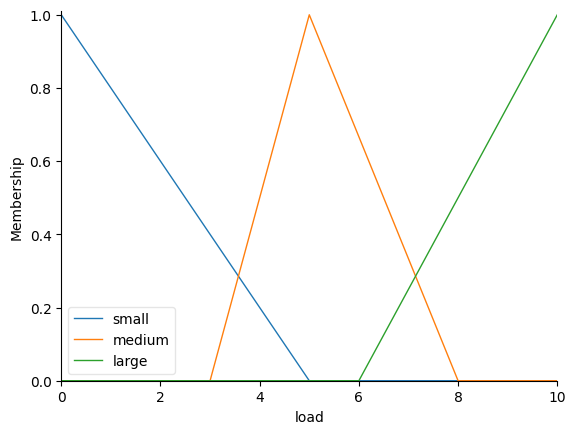

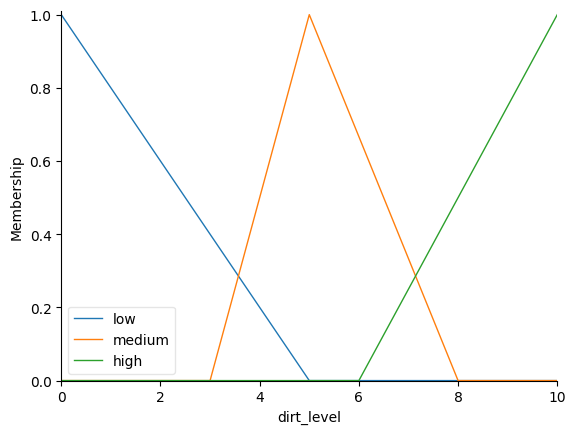

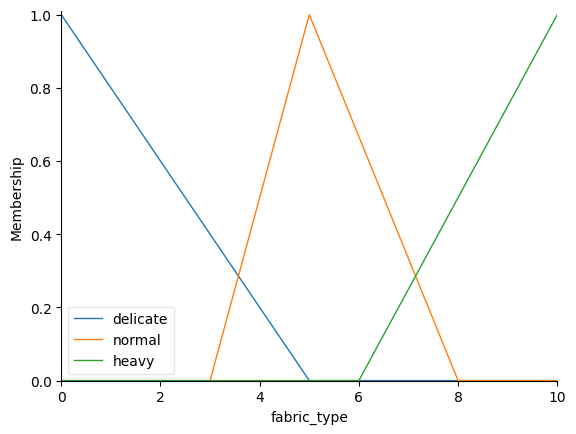

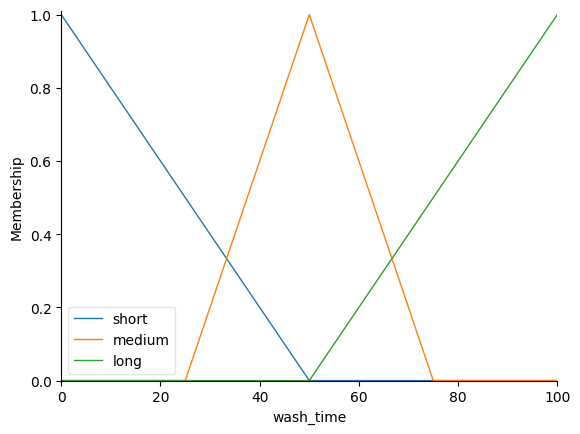

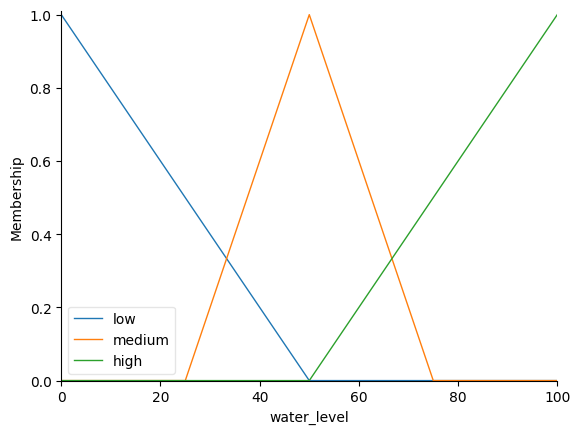

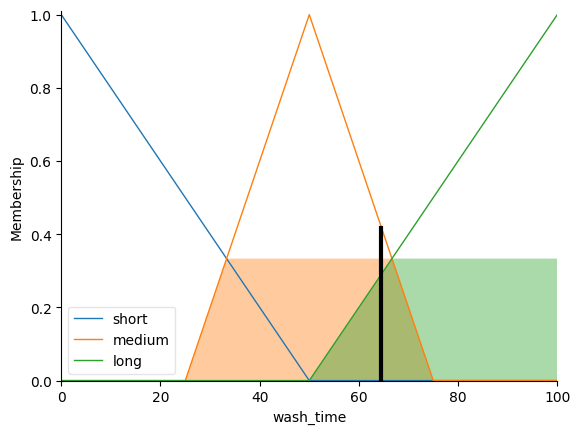

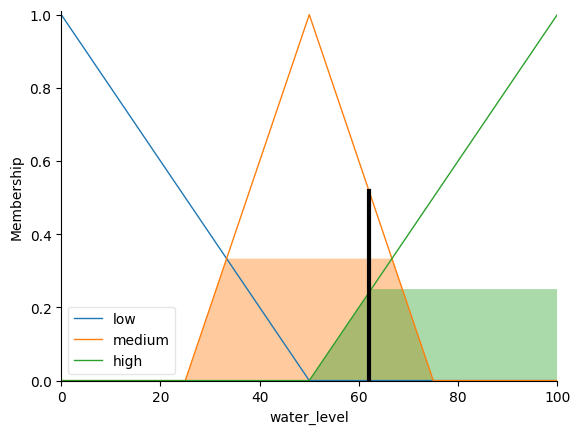

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')

wash_time = ctrl.Consequent(np.arange(0, 101, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 101, 1), 'water_level')

load['small'] = fuzz.trimf(load.universe, [0, 0, 5])
load['medium'] = fuzz.trimf(load.universe, [3, 5, 8])
load['large'] = fuzz.trimf(load.universe, [6, 10, 10])

dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 5])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [3, 5, 8])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [6, 10, 10])

fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 5])
fabric_type['normal'] = fuzz.trimf(fabric_type.universe, [3, 5, 8])
fabric_type['heavy'] = fuzz.trimf(fabric_type.universe, [6, 10, 10])

wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 50])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [25, 50, 75])
wash_time['long'] = fuzz.trimf(wash_time.universe, [50, 100, 100])

water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 50])
water_level['medium'] = fuzz.trimf(water_level.universe, [25, 50, 75])
water_level['high'] = fuzz.trimf(water_level.universe, [50, 100, 100])

load.view()
dirt_level.view()
fabric_type.view()
wash_time.view()
water_level.view()

rule1 = ctrl.Rule(load['small'] & dirt_level['low'], (wash_time['short'], water_level['low']))
rule2 = ctrl.Rule(load['small'] & dirt_level['medium'], (wash_time['medium'], water_level['medium']))
rule3 = ctrl.Rule(load['small'] & dirt_level['high'], (wash_time['long'], water_level['medium']))
rule4 = ctrl.Rule(load['medium'] & dirt_level['low'], (wash_time['medium'], water_level['medium']))
rule5 = ctrl.Rule(load['medium'] & dirt_level['medium'], (wash_time['long'], water_level['medium']))
rule6 = ctrl.Rule(load['medium'] & dirt_level['high'], (wash_time['long'], water_level['high']))
rule7 = ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['medium'], water_level['high']))
rule8 = ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['long'], water_level['high']))
rule9 = ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water_level['high']))
rule10 = ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water_level['high']))
rule11 = ctrl.Rule(load['large'] & dirt_level['high'], (wash_time['long'], water_level['high']))

rule12 = ctrl.Rule(fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule13 = ctrl.Rule(fabric_type['normal'], (wash_time['medium'], water_level['medium']))
rule14 = ctrl.Rule(fabric_type['heavy'], (wash_time['long'], water_level['high']))

rule15 = ctrl.Rule(load['large'] & dirt_level['high'] & fabric_type['heavy'], (wash_time['long'], water_level['high']))
rule16 = ctrl.Rule(load['small'] & dirt_level['low'] & fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule17 = ctrl.Rule(load['medium'] & dirt_level['medium'] & fabric_type['normal'], (wash_time['medium'], water_level['medium']))

vidu24_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
vidu24_simulation = ctrl.ControlSystemSimulation(vidu24_system)
vidu24_simulation.input['load'] = 7
vidu24_simulation.input['dirt_level'] = 4
vidu24_simulation.input['fabric_type'] = 7
vidu24_simulation.compute()
print("Wash time:", vidu24_simulation.output['wash_time'])
print("Water level:", vidu24_simulation.output['water_level'])
wash_time.view(sim=vidu24_simulation)
water_level.view(sim=vidu24_simulation)